# Exploratory Data Analysis on Automobile Dataset

In this very beginning tutorial, we will do the **fundamental exploration** in data analysis. These tasks are typically done before any of the machine learning models.

This includes:
- Data Loading
- Data Cleaning
- Summary statistics of variable
- Data visualization
- Correlations analysis 
- ...

We will use this automobile dataset on [kaggle](https://www.kaggle.com/toramky/automobile-dataset) competition as our example. The documentation of the dataset is as follows:

**Content**:

This data set consists of three types of entities: 

(a) the specification of an auto in terms of various characteristics, 

(b) its assigned insurance risk rating, 

(c) its normalized losses in use as compared to other cars. 

The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

Note: Several of the attributes in the database could be used as a "class" attribute.

We can use this dataset to:

- Predict the car price
- Practice data visualization
- Clusterings

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Load the dataset

In [3]:
df_automobile = pd.read_csv("./dataset/Automobile_data.csv")


In [4]:
len(df_automobile)

205

In [5]:
# this line retrieves the column names of the DataFrame 
df_automobile.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [6]:
# display the first five rows of a Pandas DataFrame
df_automobile.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [6]:
#  display the data types of each column 
df_automobile.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [7]:
# generate summary statistics for the numerical columns in a Pandas DataFrame 
df_automobile.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


## 2. Data cleaning

Note the missing data points are represented using "?", which is <u>not professional<u>.

In [8]:
# This line creates a new DataFrame called df_data by replacing all occurrences of the string '?' with NaN (Not-a-Number) 
df_data = df_automobile.replace('?',np.NAN) 

# this line calculates the number of missing values (i.e., NaN values) in each column 
df_data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

You can fill in the missing data with the mean/median value of each column, 
for example:
```
df.fillna(df.mean())
```
Here I just drop the rows that contains at least one ``Nan``

In [9]:
# This is a Pandas DataFrame method used to drop (remove) rows containing missing values (NaN).
# The inplace parameter is set to True, which means that the operation will be performed on the DataFrame itself, and it will modify the DataFrame in place.
df_data.dropna(inplace=True)

In [10]:
# You should expect to see that there are no missing values in any of the columns
df_data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [11]:
df_data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.735849,98.264151,172.413836,65.607547,53.899371,2461.138365,119.226415,10.161132,26.522013,32.081761
std,1.193086,5.167416,11.523177,1.947883,2.268761,481.941321,30.460791,3.889475,6.097142,6.459189
min,-2.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,7.000000,15.000000,18.000000
25%,0.000000,94.500000,165.650000,64.000000,52.250000,2065.500000,97.000000,8.700000,23.000000,28.000000
50%,1.000000,96.900000,172.400000,65.400000,54.100000,2340.000000,110.000000,9.000000,26.000000,32.000000
75%,2.000000,100.800000,177.800000,66.500000,55.500000,2809.500000,135.000000,9.400000,31.000000,37.000000
max,3.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,23.000000,49.000000,54.000000


**Caution !!!**

Wait, why still we can't get the data description from price column ??? 
There are still something wrong with the data type

In [13]:
df_data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [14]:
df_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430


In [12]:
df_data['price'].sum() 

'13950174501771023875164301692520970211055151629565755572637779576229669276098921129646479685553996529712972957295789590958845102951294510345322505195609567956695739588458495105951024511245182802555228248281763160035056538961896669768999598499698981899279927954997099664968497349729977997499799982498949954913499143991349917199196991839911900132001558016900166301795018150557279576229669276098921220181185012170150401551018150186205118705376037126777599609233112597463101988013116945348633864886918789887786938719878987788773883589258805882389298953884499639998911199115491766989481069899881089811248165581599815690777579757995819584959495999599801294013415159851651518420189501684519045214852247022625'

In [16]:
'a'+'b'

'ab'

In [13]:
# Error Case
df_data.astype('float',errors='raise') # must change to ignore

ValueError: could not convert string to float: 'audi'

In [14]:
# A better way is to using apply function
df_data = df_data.apply(pd.to_numeric,errors='ignore') # convert all columns of DataFrame

In [15]:
df_data.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [16]:
df_data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.735849,121.132075,98.264151,172.413836,65.607547,53.899371,2461.138365,119.226415,3.300126,3.236352,10.161132,95.836478,5113.836478,26.522013,32.081761,11445.729560
std,1.193086,35.651285,5.167416,11.523177,1.947883,2.268761,481.941321,30.460791,0.267336,0.294888,3.889475,30.718583,465.754864,6.097142,6.459189,5877.856195
min,-2.000000,65.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,15.000000,18.000000,5118.000000
25%,0.000000,94.000000,94.500000,165.650000,64.000000,52.250000,2065.500000,97.000000,3.050000,3.105000,8.700000,69.000000,4800.000000,23.000000,28.000000,7372.000000
50%,1.000000,113.000000,96.900000,172.400000,65.400000,54.100000,2340.000000,110.000000,3.270000,3.270000,9.000000,88.000000,5200.000000,26.000000,32.000000,9233.000000
75%,2.000000,148.000000,100.800000,177.800000,66.500000,55.500000,2809.500000,135.000000,3.560000,3.410000,9.400000,114.000000,5500.000000,31.000000,37.000000,14719.500000
max,3.000000,256.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,3.940000,4.170000,23.000000,200.000000,6600.000000,49.000000,54.000000,35056.000000


## 3. Data visualization

### 3.1 Histograms --- for numerical values

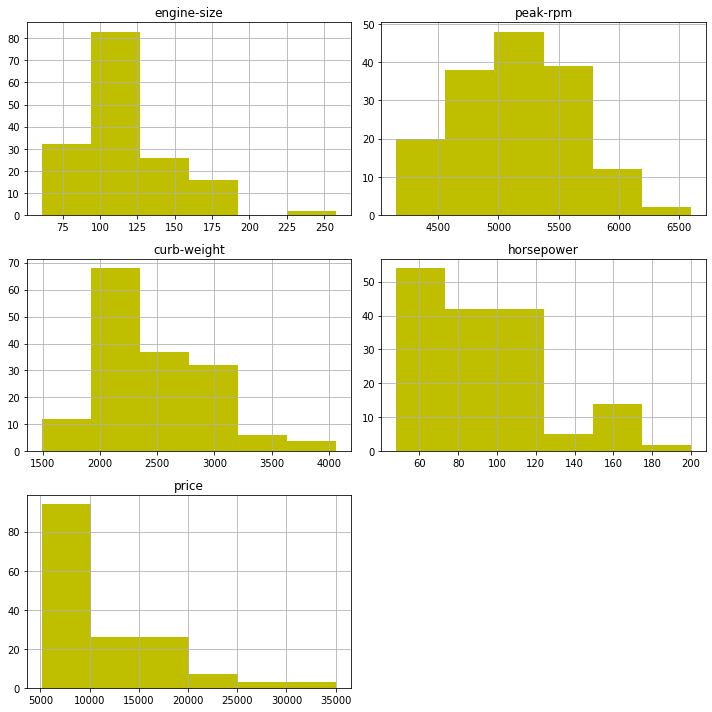

In [17]:
# This line extracts a subset of columns from the df_data DataFrame 
hist_data = df_data[['engine-size','peak-rpm','curb-weight','horsepower','price']]

# This line creates histograms for the selected columns 
hist_data.hist(bins=6,color='y',layout=(3,2),figsize=(10,10))
plt.tight_layout()
plt.show()

**Findings**

- Most of the car has a Curb Weight is in range 1900 to 3100
- The Engine Size is inrange 60 to 190
- Most vehicle has horsepower 50 to 125
- Most Vehicle are in price range 5000 to 18000
- peak rpm is mostly distributed between 4600 to 5700

### 3.2  Frequency plots ---- for categorical data values

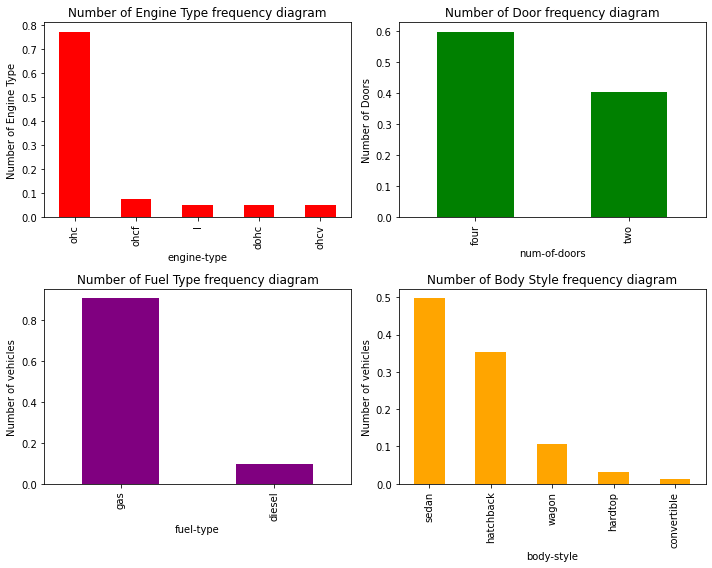

In [18]:
plt.figure()
plt.subplot(221)
df_data['engine-type'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='red')
plt.title("Number of Engine Type frequency diagram")
plt.ylabel('Number of Engine Type')
plt.xlabel('engine-type');


plt.subplot(222)
df_data['num-of-doors'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='green')
plt.title("Number of Door frequency diagram")
plt.ylabel('Number of Doors')
plt.xlabel('num-of-doors');

plt.subplot(223)
df_data['fuel-type'].value_counts(normalize= True).plot(figsize=(10,8),kind='bar',color='purple')
plt.title("Number of Fuel Type frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('fuel-type');

plt.subplot(224)
df_data['body-style'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='orange')
plt.title("Number of Body Style frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('body-style')
plt.tight_layout()
plt.show()

### 3.3 Correlation 

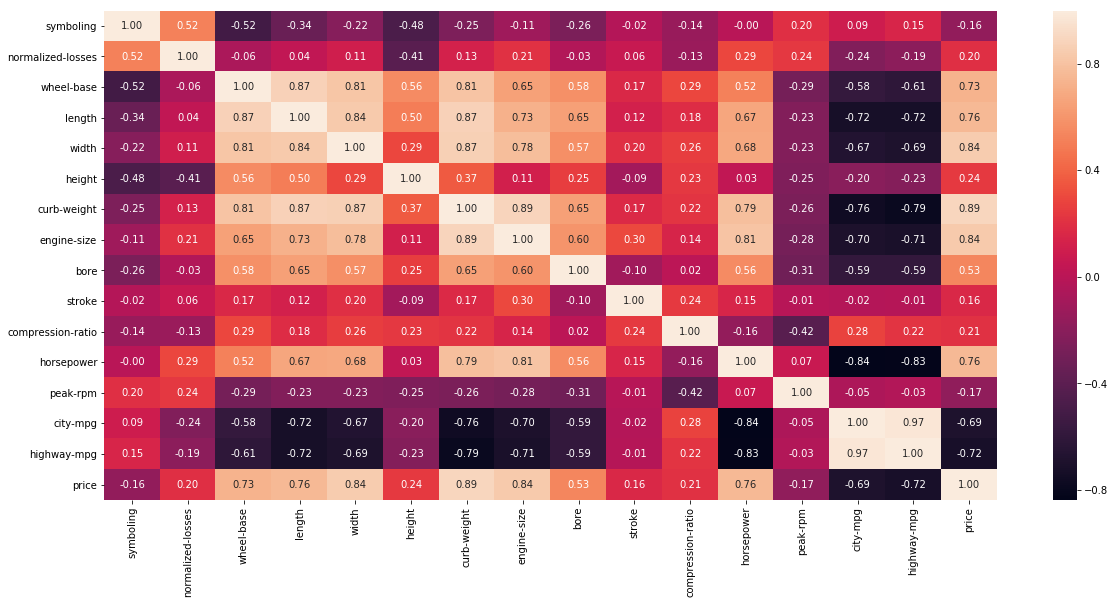

In [21]:
import seaborn as sns
corr = df_data.corr()   # The resulting corr DataFrame contains the pairwise correlations between all numerical columns
plt.figure(figsize=(20,9))

# This line creates a heatmap using Seaborn's heatmap function. It visualizes the correlation matrix corr. 
# The annot=True parameter adds annotation (correlation values) to the cells of the heatmap.
# fmt='.2f' specifies that the annotation should be formatted as floating-point numbers with two decimal places.
a = sns.heatmap(corr, annot=True, fmt='.2f')

In [22]:
# class My_class(object):
#     def __init__(self, a, b, c):
#         self.a = a
#         self.b = b
#         self.c = c
#     def print_vals(self):
#         print(self.a,self.b,self.c)

# mcls = My_class(1,2,3)